In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [62]:
import warnings
warnings.filterwarnings("ignore")

## Lets load in our data, we will start with HY and Manager data

In [63]:
data = pd.read_csv('Managers.csv')

In [64]:
data1 = pd.read_csv('HY_Agg.csv')

In [65]:
data.head()

,Date,Manager_A_Monthly_Return_Percent,Manager_B_Monthly_Return_Percent,Manager_C_Monthly_Return_Percent
0,01/31/2015,1.9610,1.58,2.088553
1,02/28/2015,-0.5723,-0.53,-0.896415
2,03/31/2015,0.3403,-0.14,-0.058587
3,04/30/2015,-0.4199,0.32,0.110233
4,05/31/2015,-0.5072,-0.12,0.244451


In [66]:
data1.head()

,Date,HY_Percent_Return,Agg
0,09/30/2019,0.317,-0.5325
1,08/30/2019,0.390,2.5913
2,07/31/2019,0.512,0.2201
3,06/28/2019,2.452,1.2556
4,05/31/2019,-1.271,1.7752


## Join the HY data and Manager data on the date (Prepping and cleaning data for linear regression)

In [67]:
newData = pd.merge(data, data1, on='Date', how='right') 

In [68]:
newData.head()

,Date,Manager_A_Monthly_Return_Percent,Manager_B_Monthly_Return_Percent,Manager_C_Monthly_Return_Percent,HY_Percent_Return,Agg
0,03/31/2015,0.3403,-0.14,-0.058587,-0.531,0.4644
1,04/30/2015,-0.4199,0.32,0.110233,1.199,-0.3588
2,06/30/2015,-1.3120,-0.58,-1.001936,-1.525,-1.0904
3,07/31/2015,0.8449,-0.32,-0.892478,-0.616,0.6951
4,08/31/2015,-0.5512,-0.62,-0.126473,-1.761,-0.1436


In [69]:
newData['ManagerAData'] = (newData['Manager_A_Monthly_Return_Percent'] - newData['Agg']).abs()

In [70]:
newData['ManagerAData'].head() # Sanity check |.3403 - .4644| = .1241 so our absolute value function worked!

0    0.1241
1    0.0611
2    0.2216
3    0.1498
4    0.4076
Name: ManagerAData, dtype: float64

In [71]:
newData.head() # Adding columns to NewData with the absolute value 

,Date,Manager_A_Monthly_Return_Percent,Manager_B_Monthly_Return_Percent,Manager_C_Monthly_Return_Percent,HY_Percent_Return,Agg,ManagerAData
0,03/31/2015,0.3403,-0.14,-0.058587,-0.531,0.4644,0.1241
1,04/30/2015,-0.4199,0.32,0.110233,1.199,-0.3588,0.0611
2,06/30/2015,-1.3120,-0.58,-1.001936,-1.525,-1.0904,0.2216
3,07/31/2015,0.8449,-0.32,-0.892478,-0.616,0.6951,0.1498
4,08/31/2015,-0.5512,-0.62,-0.126473,-1.761,-0.1436,0.4076


In [72]:
newData['ManagerBData'] = (newData['Manager_B_Monthly_Return_Percent'] - newData['Agg']).abs()

In [73]:
ManagerBData.head()

0    0.6044
1    0.6788
2    0.5104
3    1.0151
4    0.4764
dtype: float64

In [74]:
newData['ManagerCData'] = (newData['Manager_C_Monthly_Return_Percent'] - newData['Agg']).abs()

In [75]:
ManagerCData.head()

0    0.522987
1    0.469033
2    0.088464
3    1.587578
4    0.017127
dtype: float64

In [76]:
newData['HY_Data'] = (newData['HY_Percent_Return'] - newData['Agg']).abs()

In [77]:
HY_Data.head()

0    0.9954
1    1.5578
2    0.4346
3    1.3111
4    1.6174
dtype: float64

In [78]:
newData.head()

,Date,Manager_A_Monthly_Return_Percent,Manager_B_Monthly_Return_Percent,Manager_C_Monthly_Return_Percent,HY_Percent_Return,Agg,ManagerAData,ManagerBData,ManagerCData,HY_Data
0,03/31/2015,0.3403,-0.14,-0.058587,-0.531,0.4644,0.1241,0.6044,0.522987,0.9954
1,04/30/2015,-0.4199,0.32,0.110233,1.199,-0.3588,0.0611,0.6788,0.469033,1.5578
2,06/30/2015,-1.3120,-0.58,-1.001936,-1.525,-1.0904,0.2216,0.5104,0.088464,0.4346
3,07/31/2015,0.8449,-0.32,-0.892478,-0.616,0.6951,0.1498,1.0151,1.587578,1.3111
4,08/31/2015,-0.5512,-0.62,-0.126473,-1.761,-0.1436,0.4076,0.4764,0.017127,1.6174


## Lets do some descriptive statistics on our variables

In [79]:
newData['ManagerAData'].describe() # Manager A Returns

count    39.000000
mean      0.205133
std       0.205348
min       0.009500
25%       0.061600
50%       0.149800
75%       0.235900
max       1.043300
Name: ManagerAData, dtype: float64

In [81]:
newData['ManagerBData'].describe() # Manager B Returns

count    39.000000
mean      0.407305
std       0.312504
min       0.009700
25%       0.166950
50%       0.344900
75%       0.525700
max       1.505400
Name: ManagerBData, dtype: float64

In [82]:
newData['ManagerCData'].describe() # Manager C Returns

count    39.000000
mean      0.517487
std       0.521741
min       0.017127
25%       0.105487
50%       0.448559
75%       0.705118
max       2.586232
Name: ManagerCData, dtype: float64

In [84]:
newData['HY_Data'].describe() # HY Return

count    57.000000
mean      1.387904
std       1.047271
min       0.015900
25%       0.696300
50%       1.196400
75%       1.893800
max       4.029100
Name: HY_Data, dtype: float64

## Linear Regression model 

Text(0.5, 1.0, 'Absolute value of Manager A and Agg. Versus HY')

<Figure size 1080x3240 with 0 Axes>

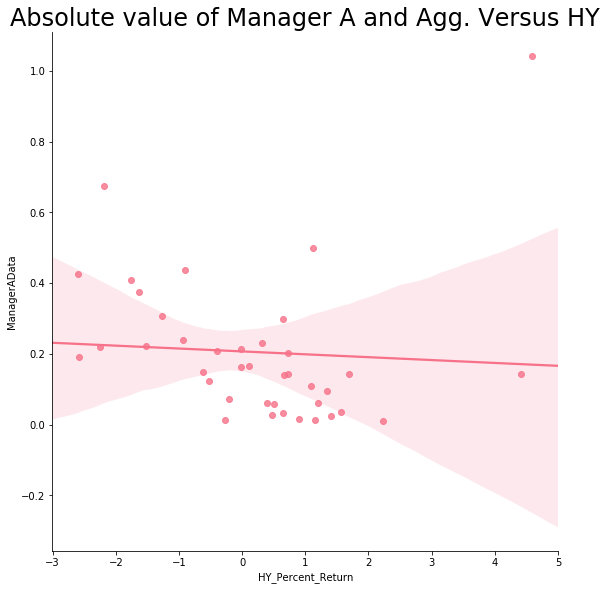

In [94]:
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('HY_Percent_Return','ManagerAData', data = newData, height=8, fit_reg=True)
plt.title('Absolute value of Manager A and Agg. Versus HY', size=24)

Text(0.5, 1.0, 'Absolute value of Manager B and Agg. Versus HY')

<Figure size 1080x3240 with 0 Axes>

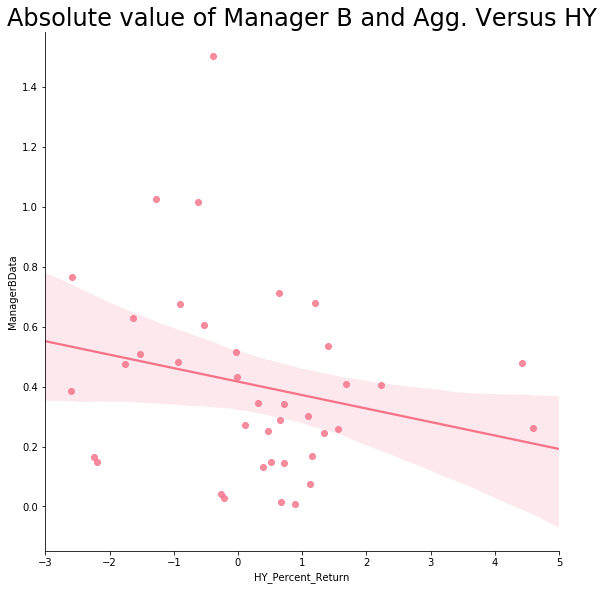

In [96]:
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('HY_Percent_Return', 'ManagerBData', data = newData, height=8, fit_reg=True)
plt.title('Absolute value of Manager B and Agg. Versus HY', size=24)

Text(0.5, 1.0, 'Absolute value of Manager C and Agg. Versus HY')

<Figure size 1080x3240 with 0 Axes>

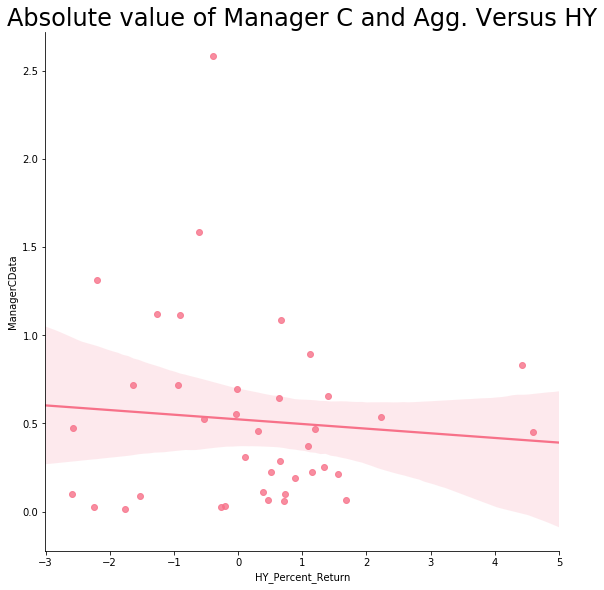

In [97]:
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('HY_Percent_Return', 'ManagerCData', data = newData, height=8, fit_reg=True)
plt.title('Absolute value of Manager C and Agg. Versus HY', size=24)

Text(0.5, 1.0, 'Absolute value of HY and Agg. Versus HY')

<Figure size 1080x3240 with 0 Axes>

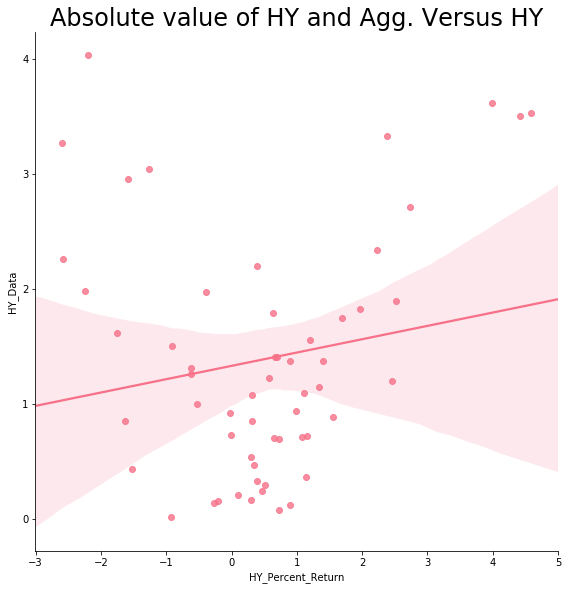

In [98]:
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('HY_Percent_Return', 'HY_Data', data = newData, height=8, fit_reg=True)
plt.title('Absolute value of HY and Agg. Versus HY', size=24)

# Correlation Matrix to show which managers have most correlated return amongst the HY Index

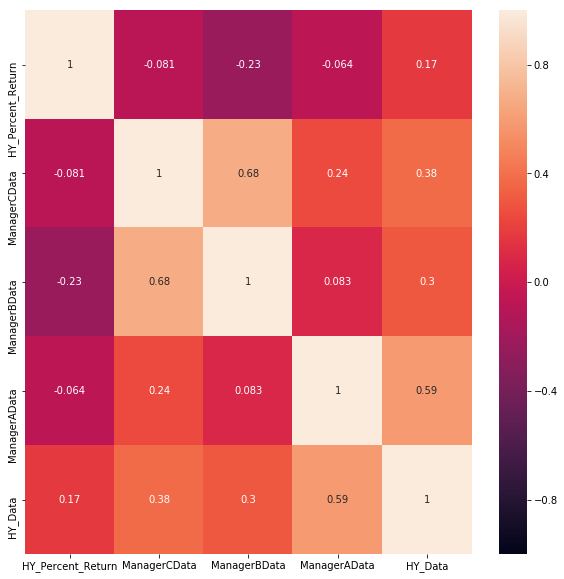

In [99]:
#Pairwise correlation between attributes
fig=plt.figure(figsize=(10, 10))
sns.heatmap(newData[['HY_Percent_Return', 'ManagerCData', 'ManagerBData', 'ManagerAData', 'HY_Data' ]].corr(), vmin = -1, vmax=1, annot=True)
plt.show()